In [41]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import load_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yaml


with open("../config.yml", "r") as file:
    config = yaml.safe_load(file)

urls = [
    config["api"]["products"],
    config["api"]["crm"],
    config["api"]["sales"],
    config["api"]["country"]
]


data = load_data(urls)
products = pd.DataFrame(data.get("http://localhost:8069/api/products", {}).get("Products", []))
countries = pd.DataFrame(data.get(config["api"]["country"], {}).get("Countries", []))
sales_orders = pd.DataFrame(data.get(config["api"]["sales"], {}).get("sales_orders", []))
order_lines = pd.DataFrame(data.get(config["api"]["sales"], {}).get("order_lines", []))
CRM = pd.DataFrame(data.get(config["api"]["crm"], {}).get("CRM", []))


In [42]:
print("\n📌 DataFrames dimensions")
print("Products: ", products.shape)
print("Countries:", countries.shape)
print("Sales Orders:", sales_orders.shape)
print("Order Lines:", order_lines.shape)
print("CRM:", CRM.shape)




📌 DataFrames dimensions
Products:  (18, 4)
Countries: (250, 3)
Sales Orders: (51, 9)
Order Lines: (68, 6)
CRM: (10, 7)


In [43]:
print("\n📌 Primeros registros de cada dataset:")
print("\n Products")
print(products.head())
print("\n Countries")
print(countries.head())
print("\n Sales orders")
print(sales_orders.head())
print("\n Order lines")
print(order_lines.head())
print("\n CRM")
print(CRM.head())


📌 Primeros registros de cada dataset:

 Products
   id                                    name     category  \
0   5                           Communication          All   
1   7                       Standard delivery   Deliveries   
2   6                                Expenses     Expenses   
3  12  AUDIFONOS ARGOM BLUETOOTH ARG-HS-2552B  Electronics   
4   1                                   Meals          All   

                                         image_route  
0     C:/Users/User/Downloads/imgs/Communication.jpg  
1  C:/Users/User/Downloads/imgs/Standard_delivery...  
2          C:/Users/User/Downloads/imgs/Expenses.jpg  
3  C:/Users/User/Downloads/imgs/AUDIFONOS_ARGOM_B...  
4             C:/Users/User/Downloads/imgs/Meals.jpg  

 Countries
   id code            name
0   3   AF     Afghanistan
1   6   AL         Albania
2  62   DZ         Algeria
3  11   AS  American Samoa
4   1   AD         Andorra

 Sales orders
  order_id   partner_invoice    partner_shipping          

In [44]:
print("\n📌 Estadísticas descriptivas de los datos numéricos:")
print("\n Products")
print(products.describe())
print("\n Sales orders")
print(sales_orders.describe())
print("\n Order lines")
print(order_lines.describe())
print("\n CRM")
print(CRM.describe())


📌 Estadísticas descriptivas de los datos numéricos:

 Products
              id
count  18.000000
mean   10.555556
std     6.242381
min     1.000000
25%     5.250000
50%    11.000000
75%    15.750000
max    20.000000

 Sales orders
       amount_untaxed     amount_tax  amount_total
count    5.100000e+01      51.000000  5.100000e+01
mean     8.110910e+04   14546.576471  9.565567e+04
std      2.099773e+05   37793.903376  2.477711e+05
min      6.000000e+01       0.000000  6.000000e+01
25%      1.405500e+03       0.000000  1.419550e+03
50%      2.499500e+04    4499.100000  2.949410e+04
75%      5.782000e+04   10407.600000  6.822760e+04
max      1.290775e+06  232161.300000  1.522936e+06

 Order lines
        quantity    unit_price      subtotal
count  68.000000     68.000000  6.800000e+01
mean    5.588235  11041.000000  6.083182e+04
std     7.800182  12607.382809  1.792642e+05
min     1.000000      0.000000  0.000000e+00
25%     1.000000    198.000000  9.937500e+02
50%     3.000000   1995.0

In [45]:
def count_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values_percent = (missing_values / df.shape[0]) * 100
    return pd.DataFrame({"missing_values": missing_values, "Percentage": missing_values_percent})

print("\n📌 Valores faltantes en cada dataset:")
print(count_missing_values(products))
print(count_missing_values(sales_orders))
print(count_missing_values(order_lines))


📌 Valores faltantes en cada dataset:
Empty DataFrame
Columns: [missing_values, Percentage]
Index: []
Empty DataFrame
Columns: [missing_values, Percentage]
Index: []
Empty DataFrame
Columns: [missing_values, Percentage]
Index: []


In [46]:

print("\n📌 Datasets Dtypes:")
print("\n Products:")
print(products.dtypes)
print("\n Countries:")
print(countries.dtypes)
print("\n Sales orders:")
print(sales_orders.dtypes)
print("\n Order lines:")
print(order_lines.dtypes)
print("\n CRM:")
print(CRM.dtypes)


📌 Datasets Dtypes:

 Products:
id              int64
name           object
category       object
image_route    object
dtype: object

 Countries:
id       int64
code    object
name    object
dtype: object

 Sales orders:
order_id             object
partner_invoice      object
partner_shipping     object
date_order           object
state                object
amount_untaxed      float64
amount_tax          float64
amount_total        float64
country_code         object
dtype: object

 Order lines:
id               object
order_id         object
product_name     object
quantity        float64
unit_price      float64
subtotal        float64
dtype: object

 CRM:
lead_id          int64
name            object
email_from      object
phone           object
stage           object
contact_name    object
image_html      object
dtype: object



📌 Histplot :


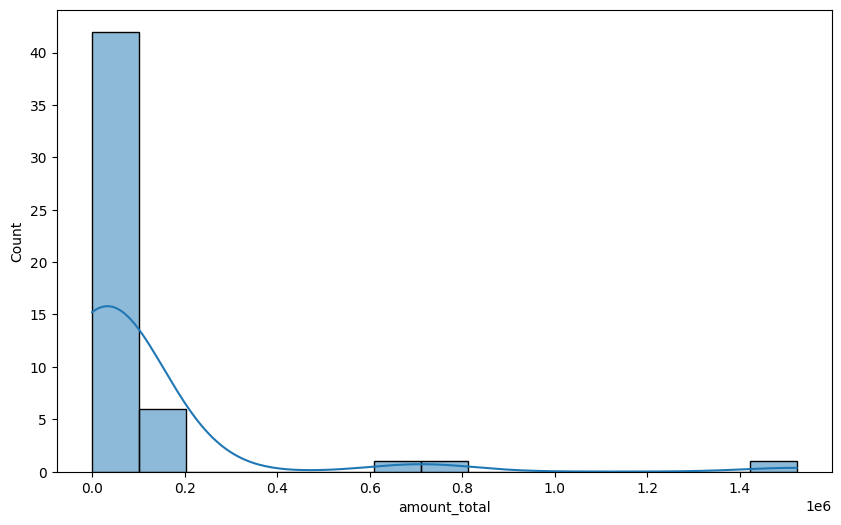

In [47]:
print("\n📌 Histplot :")
plt.figure(figsize=(10, 6))
sns.histplot(sales_orders["amount_total"], bins=15, kde=True)
plt.show()


📌 Boxplot:


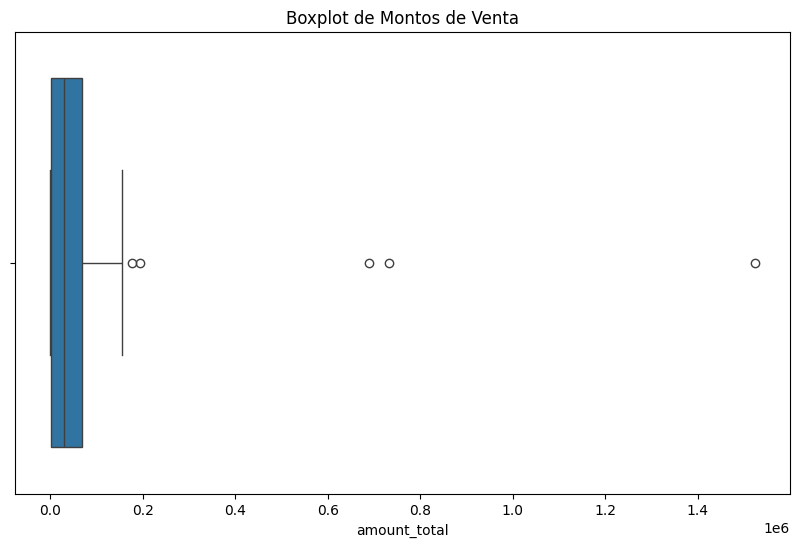

In [48]:
print("\n📌 Boxplot:")
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_orders["amount_total"])
plt.title("Boxplot de Montos de Venta")
plt.show()

In [49]:
products.to_parquet("../data/raw/products.parquet")
countries.to_parquet("../data/raw/countries.parquet")
sales_orders.to_parquet("../data/raw/sales_orders.parquet")
order_lines.to_parquet("../data/raw/order_lines.parquet")
CRM.to_parquet("../data/raw/CRM.parquet")